In [14]:
import tensorflow as tf


from ipywidgets import interact, interactive
import os
import numpy as np
import sys
import timeit
import csv
sys.path.append('/Users/zhouji/Google Drive/RWTH/GP_old')

import matplotlib.pyplot as plt

import gempy as gp
from gempy.core.tensor.tensorflow_graph_test import TFGraph
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
from gempy import create_data, map_series_to_surfaces
from gempy.assets.geophysics import GravityPreprocessing
tfd = tfp.distributions
%matplotlib inline

In [15]:
geo_model = gp.create_model('Fold')

path = '/Users/zhouji/Google Drive/RWTH/GP_old/notebooks/'
# set regular grid to low resolution to save memory

gp.init_data(geo_model, [0, 1000., 0, 1000., 0, 1000.], [50, 50, 50],
                 path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
                  path_i=path + '/data/input_data/George_models/'+'model2'+'_surface_points.csv',
             default_values=True)

gp.map_stack_to_surfaces(geo_model,
                        {"Strat_Series": (
    'rock2', 'rock1'), "Basement_Series": ('basement')},
                         remove_unused_series=True)

# geo_data = create_data([0, 1000, 0, 1000, 0, 1000], resolution=[50, 50, 50],
#                       path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
#                       path_i=path + "/data/input_data/George_models/180surface_points.csv")
# map_series_to_surfaces(geo_data, {"Strat_Series": (
#     'rock2', 'rock1'), "Basement_Series": ('basement')})

Active grids: ['regular']


,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


In [16]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1732.05
$C_o$            71428.6
drift equations   [3, 3]


In [17]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,400,100,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
1,400,500,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
2,400,900,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
3,600,100,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
4,600,500,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
5,600,900,320,1.000000e-12,1.000000e-12,1.0,0.01,rock1
6,400,100,620,1.000000e-12,1.000000e-12,1.0,0.01,rock2
7,400,500,620,1.000000e-12,1.000000e-12,1.0,0.01,rock2
8,400,900,620,1.000000e-12,1.000000e-12,1.0,0.01,rock2
9,600,100,620,1.000000e-12,1.000000e-12,1.0,0.01,rock2


In [18]:
geo_model._surface_points

,X,Y,Z,smooth,surface
0,10.0,10.0,109.423228,0.000002,rock1
1,10.0,990.0,109.423228,0.000002,rock1
2,340.0,220.0,362.892004,0.000002,rock1
3,360.0,180.0,371.448116,0.000002,rock1
4,360.0,820.0,371.448116,0.000002,rock1
5,640.0,180.0,371.448116,0.000002,rock1
6,640.0,820.0,371.448116,0.000002,rock1
7,990.0,10.0,109.423228,0.000002,rock1
8,990.0,990.0,109.423228,0.000002,rock1
9,10.0,10.0,309.423228,0.000002,rock2


In [19]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


In [20]:
sol = gp.compute_model(geo_model)

In [21]:
geo_model.solutions.lith_block

array([3., 3., 3., ..., 1., 1., 1.])

In [22]:
from gempy.plot.vista import GemPyToVista

/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


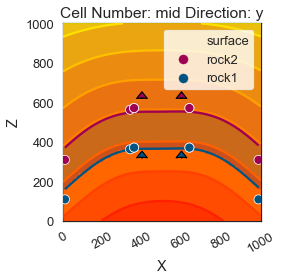

In [23]:
gp.plot_2d(geo_model,show_scalar = True)

In [24]:
gp.plot_3d(geo_model,show_results = False, show_lith=False,notebook=False)

In [12]:
geo_model._surfaces

,surface,series,order_surfaces,color,id
1,rock2,Strat_Series,1,#9f0052,1
0,rock1,Strat_Series,2,#015482,2
2,basement,Basement_Series,1,#ffbe00,3


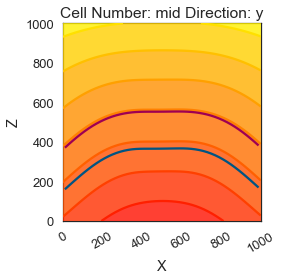

In [21]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

In [22]:
geo_model.solutions.scalar_field_matrix

array([[0.47154258, 0.48994284, 0.50840573, ..., 1.22714915, 1.24453857,
        1.26202265]])

In [23]:
GP

In [26]:
## surface data
GP = gp.plot_3d(geo_model,show_lith = False,show_surfaces=False, notebook=False)

In [22]:
## scalar field
GP = gp.plot_3d(geo_model,show_scalar = False,show_lith = True,show_surfaces=False, notebook=False,scalar_field = 'Strat_Series')

In [ ]:
geo_model.solutions.mask_matrix.shape

In [ ]:
import pyvista as pv

grav_res_x = 7
grav_res_y = 7
X = np.linspace(0, 1000, grav_res_x)
Y = np.linspace(0, 1000, grav_res_y)
Z = 1000
xyz = np.meshgrid(X, Y, Z)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T

In [ ]:
poly = pv.PolyData(xy_ravel)
geom = pv.Cone(direction=[0.0, 0.0, -1.0])

In [ ]:
glyphs = poly.glyph(factor=30.0,geom=geom)

In [ ]:
GP = gp.plot_3d(geo_model, show_surfaces=True, notebook=False,off_screen=True)

GP.p.add_mesh(glyphs, color="tan",render_points_as_spheres=True,point_size=10)
GP.set_bounds()

# GP.p.add_mesh(poly, color="tan",render_points_as_spheres=True,point_size=10)
GP.p.show()

In [ ]:
geo_model.solutions.scalar_field_at_surface_points.sum(axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.imshow(GP.p.image,interpolation='nearest',aspect='auto')
plt.axis('off')
# plt.savefig('/Users/zhouji/Documents/IRTG/IRTG2020/Poster_IRTG_2020/figs/3D_block.png')

In [ ]:
# fig, ax = plt.subplots(figsize=(18, 14))
# ax.imshow(pv.p.image,interpolation='nearest',aspect='auto')
# plt.axis('off')
# plt.savefig('/Users/zhouji/Documents/Presentations/IRTG 2020/Poster_IRTG_2020/figs/3D_block.png')

In [ ]:
fig, ax = plt.subplots(figsize=[6, 6])
rec = ax.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=10, zorder=1,label = 'Receivers')
ax.legend([rec],['Receivers'],loc='center left', bbox_to_anchor=(1.3, 0.5))

In [ ]:
xy_ravel

In [25]:
gpv = GemPyToVista(geo_model)

In [29]:
regular_grid, cmap = gpv.create_regular_mesh('lith','Default','', True)

In [13]:
list(gpv._get_color_lot(is_faults=True, is_basement=True))

NameError: name 'gpv' is not defined

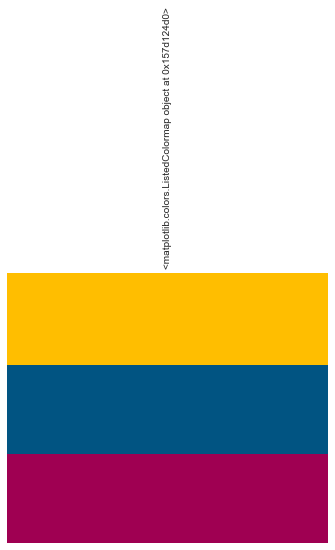

In [30]:
#!python
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[cmap]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=10)

In [9]:
geo_model._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",0.741361,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",0.563486,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [28]:
from gempy.plot.vista import GemPyToVista
gpv = GemPyToVista(geo_model)
gpv.plot_surface_points(surfaces='all')
gpv.p.show()

[(513.6567632102681, 3841.3783094155347, 676.5131975027019),
 (500.0, 500.0, 500.0),
 (-0.14330889643074615, -0.0516242859477701, 0.9883306599029419)]

In [44]:
import pyvista as pv
import matplotlib.colors as mcolors
from pyvista.plotting.theme import parse_color

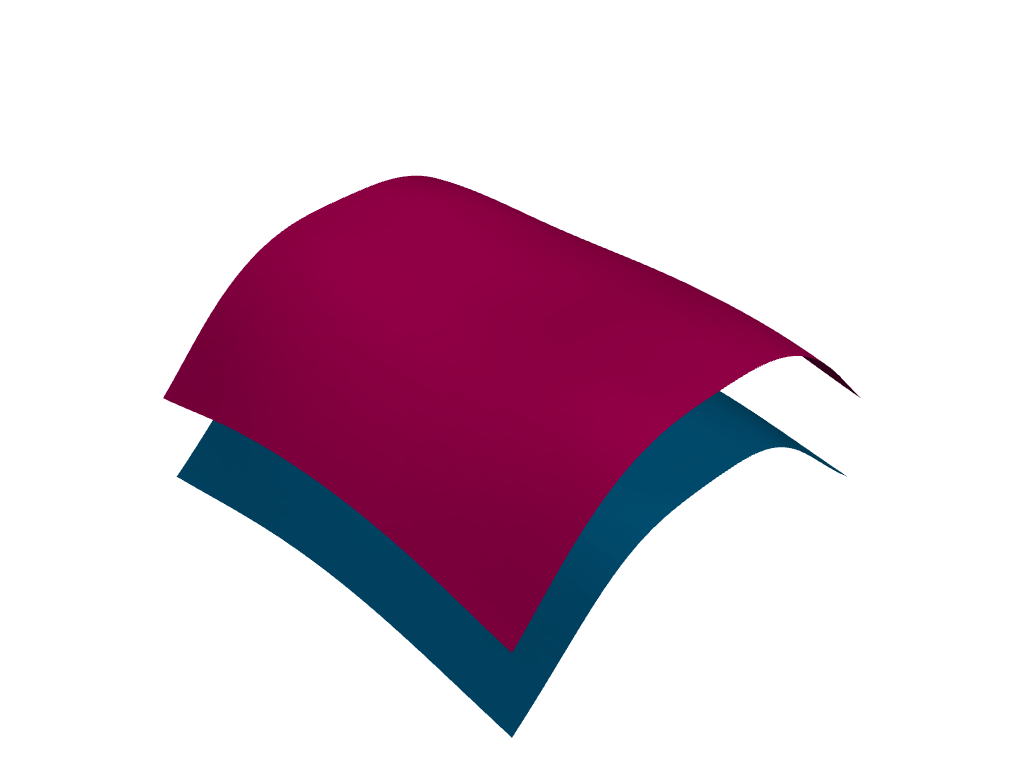

In [50]:
surfaces_df = gpv._select_surfaces_data(gpv.model.surfaces.df, 'all')
select_active = surfaces_df['isActive']
p = pv.Plotter()
cmap = mcolors.ListedColormap(list(gpv._get_color_lot(is_faults=True, is_basement=True)))
for idx, val in surfaces_df[select_active][['vertices', 'edges', 'color', 'surface', 'id']].dropna().iterrows():
            surf = pv.PolyData(val['vertices'], np.insert(val['edges'], 0, 3, axis=1).ravel())
            # surf['id'] = val['id']
            gpv.surface_poly[val['surface']] = surf
            gpv.surface_actors[val['surface']] = p.add_mesh(
                surf, parse_color(val['color']), show_scalar_bar=True,
                cmap=cmap)
p.show()

In [51]:
gpv.model._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",0.741361,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",0.563486,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


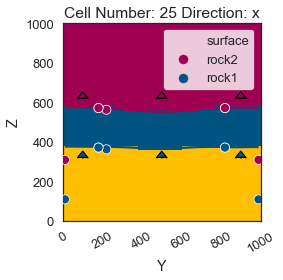

In [52]:
gp.plot_2d(geo_model,cell_number=25,direction ='x')

In [57]:
geo_model._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
1,rock2,Strat_Series,1,False,False,True,True,#9f0052,"[[10.0, 10.0, 309.43227767944336], [10.0, 14.3...","[[2, 1, 0], [5, 4, 3], [5, 3, 1], [6, 5, 1], [...",0.741361,1
0,rock1,Strat_Series,2,False,False,True,True,#015482,"[[10.0, 10.0, 109.4232177734375], [10.0, 14.81...","[[2, 1, 0], [3, 1, 2], [4, 3, 2], [5, 3, 4], [...",0.563486,2
2,basement,Basement_Series,1,True,False,True,False,#ffbe00,NaN,NaN,NaN,3


In [56]:
geo_model._sat

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series,1,Erosion,True,False,False
Basement_Series,2,Erosion,False,False,False
